In [11]:
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt

# P-value distributions with and without effect

Since we are already familiar with contingency tables, and their statistical testing, we will stick to them. First, we create a data set with no difference in trait probabilities between the two populations. Let's keep it totally random. We will first come up with two random sizes for populations A and B. Either of them anywhere between 20 to 200 individuals.

Then we will generate a random number for the frequency of a trait. Anything between 0 to 100%.

Next, we will assign this trait randomly to everyone in both populations, and create the contingency table.

Finally, we run a Fisher test (chi2's exact cousin) to check the significance of the difference between the two populations regarding the occurence of the trait. (But remember, there is no REAL difference between them: any difference we see is due to randomness here, since we will use the same probability for the trait for both groups.)

You can run the cell below a few times to get a feel for the randomness at play.

In [12]:
pop_A = np.random.randint(20,200)
pop_B = np.random.randint(20,200)
print('population A: %d individuals' % pop_A)
print('population B: %d individuals' % pop_B)

p_trait = np.random.uniform(0, 1.0)
print()
print('trait probability: %.2f' % p_trait)

traits_in_A = (np.random.random(pop_A) < p_trait)
positive_in_A = sum(traits_in_A)
negative_in_A = pop_A - positive_in_A

traits_in_B = (np.random.random(pop_B) < p_trait)
positive_in_B = sum(traits_in_B)
negative_in_B = pop_B - positive_in_B

print()
print('positive/negative individuals in population A: %3d / %3d' % (positive_in_A, negative_in_A))
print('positive/negative individuals in population B: %3d / %3d' % (positive_in_B, negative_in_B))

pval = fisher_exact([[positive_in_A, negative_in_A], [positive_in_B, negative_in_B]])[1]

print()
print('Chi2-test p-value: %.3f' % pval)
#plt.plot(sorted(pvals))

population A: 172 individuals
population B: 177 individuals

trait probability: 0.84

positive/negative individuals in population A: 144 /  28
positive/negative individuals in population B: 150 /  27

Chi2-test p-value: 0.883


Now we run the above 1000 times, every time on random sized populations, with different random trait probabilities,
and keep track of the p-values that we see.

In [13]:
pvals = []
for i in range(1000):
    pop_A = np.random.randint(10,200)
    pop_B = np.random.randint(10,200)

    p_trait = np.random.uniform(0, 1.0)

    traits_in_A = (np.random.random(pop_A) < p_trait)
    positive_in_A = sum(traits_in_A)
    negative_in_A = pop_A - positive_in_A

    traits_in_B = (np.random.random(pop_B) < p_trait)
    positive_in_B = sum(traits_in_B)
    negative_in_B = pop_B - positive_in_B

    pval = fisher_exact([[positive_in_A, negative_in_A], [positive_in_B, negative_in_B]])[1]
    pvals.append(pval)

Let's plot the p-values in ascending order. Remember, the test should produce p-values rather uniformly between
0 and 1, since we know for a fact that there is no real difference between the populations outside sampling
randomness. It should result in a straight line.

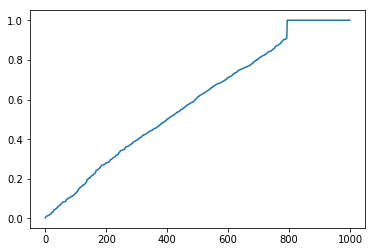

In [14]:
plt.plot(sorted(pvals))

In histogram form:

(array([ 38.,  39.,  35.,  30.,  36.,  43.,  41.,  44.,  50.,  44.,  49.,
         44.,  45.,  56.,  46.,  56.,  51.,  34.,  13., 206.]),
 array([0.00275856, 0.05262064, 0.10248271, 0.15234478, 0.20220685,
        0.25206892, 0.30193099, 0.35179307, 0.40165514, 0.45151721,
        0.50137928, 0.55124135, 0.60110343, 0.6509655 , 0.70082757,
        0.75068964, 0.80055171, 0.85041378, 0.90027586, 0.95013793,
        1.        ]),
 <a list of 20 Patch objects>)

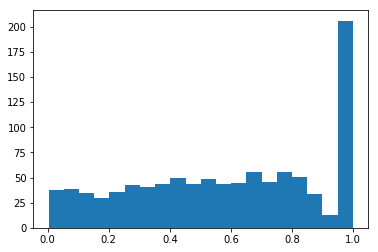

In [15]:
plt.hist(pvals, bins=20)

It's flat across the range of possible p-values. That spike near 1.0 is just an artefact of small sample counts,
where the expected contingency table matches the observed one perfectly. If we increased the population sizes, this peak would shrink, and the histogram would be perfectly flat.

So now, Benjamini-Hochberg-corrected p-values: we don't expect to find anything, after correction we expect to see all p-values close to 1.

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <a list of 20 Patch objects>)

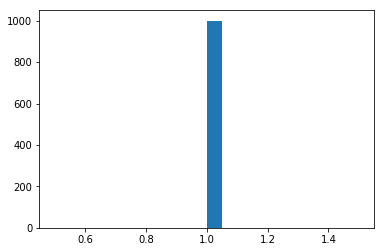

In [16]:
from statsmodels.sandbox.stats.multicomp import multipletests
rej, corrected_p, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(corrected_p, bins=20)

Now we will mix in traits that DO have differences between the two populations. We will use different trait frequencies in 10% of the cases. And then plot the resulting p-values.

In [17]:
use_effect = 0.1  # 10% of the time we will use different trait probabilities for the two populations.

pvals = []
for i in range(1000):
    pop_A = np.random.randint(10,200)
    pop_B = np.random.randint(10,200)

    p_trait_A = np.random.uniform(0, 1.0)
    if use_effect < np.random.random():  # now we make a random decision:
        p_trait_B = np.random.uniform(0, 1.0)  # we give population B a completely different trait frequency
    p_trait_B = p_trait_A if np.random.random()>use_effect else np.random.uniform(0, 1.0)

    traits_in_A = (np.random.random(pop_A) < p_trait_A)
    positive_in_A = sum(traits_in_A)
    negative_in_A = pop_A - positive_in_A

    traits_in_B = (np.random.random(pop_B) < p_trait_B)
    positive_in_B = sum(traits_in_B)
    negative_in_B = pop_B - positive_in_B

    pval = fisher_exact([[positive_in_A, negative_in_A], [positive_in_B, negative_in_B]])[1]
    pvals.append(pval)

We should see a disproportionate amount of very low p-values at the left side of the chart: the 10% of tests where we used a real effect.

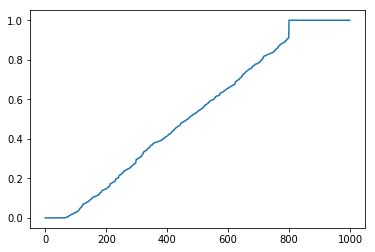

In [18]:
plt.plot(sorted(pvals))

(array([116.,  37.,  49.,  34.,  40.,  28.,  32.,  51.,  39.,  41.,  44.,
         41.,  43.,  41.,  31.,  43.,  44.,  38.,   8., 200.]),
 array([4.59543492e-43, 5.00000000e-02, 1.00000000e-01, 1.50000000e-01,
        2.00000000e-01, 2.50000000e-01, 3.00000000e-01, 3.50000000e-01,
        4.00000000e-01, 4.50000000e-01, 5.00000000e-01, 5.50000000e-01,
        6.00000000e-01, 6.50000000e-01, 7.00000000e-01, 7.50000000e-01,
        8.00000000e-01, 8.50000000e-01, 9.00000000e-01, 9.50000000e-01,
        1.00000000e+00]),
 <a list of 20 Patch objects>)

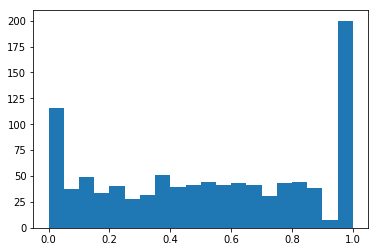

In [19]:
plt.hist(pvals, bins=20)

The peak around 0 is very obvious. Clearly, some of our tests must have been successful, since we have way more than 5% of samples in the lowest 5% bin. That's usually a sign of a) real effects b) or a poorly designed test. This time it's a).

(array([ 70.,   7.,   4.,   6.,   7.,  11.,   6.,   2.,   5.,   4.,   1.,
         22.,   8.,  28.,  25.,   7.,  28.,  15.,  42., 702.]),
 array([3.91434181e-40, 5.00000000e-02, 1.00000000e-01, 1.50000000e-01,
        2.00000000e-01, 2.50000000e-01, 3.00000000e-01, 3.50000000e-01,
        4.00000000e-01, 4.50000000e-01, 5.00000000e-01, 5.50000000e-01,
        6.00000000e-01, 6.50000000e-01, 7.00000000e-01, 7.50000000e-01,
        8.00000000e-01, 8.50000000e-01, 9.00000000e-01, 9.50000000e-01,
        1.00000000e+00]),
 <a list of 20 Patch objects>)

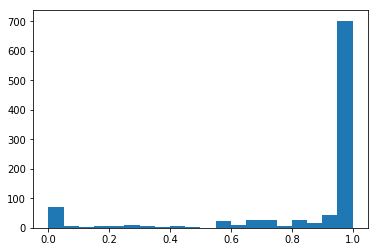

In [20]:
from statsmodels.sandbox.stats.multicomp import multipletests
rej, corrected_p, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
plt.hist(corrected_p, bins=20)

And now we see, the majority of those 10% did survive the corrections.